# Cas Kaggle - Dataset mushrooms

## Albert Roca i Llevadot
## NIU : 1603375

link al dataset

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, QuantileRegressor, SGDClassifier, Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.manifold import TSNE
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# !pip install ipywidgets                   # descomentar si falta el paquet
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")


# Funcio per a llegir dades en format csv

url = 'https://raw.githubusercontent.com/AlbertRoca29/Datasets/main/datasets/mushrooms.csv'

def load_dataset(path):
    dataset = pd.read_csv(url, header=0, delimiter=',')
    return dataset

dataset = load_dataset(url)

# Visualització del dataset

Primera visualització del dataset que inclou variables que descriuen diferents característiques del dataset.

Un cop conegudes les diferents variables decidiré quina estretègia seguir

| Variable | Valors que pot pendre |
|-:|:-|
|cap-shape| bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s |
|cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s|
|cap-color| brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|
|bruises| bruises=t,no=f|
|odor| almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s|
|gill-attachment| attached=a,descending=d,free=f,notched=n|
|gill-spacing| close=c,crowded=w,distant=d|
|gill-size| broad=b,narrow=n|
|gill-color| black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
|stalk-shape| enlarging=e,tapering=t|
|stalk-root| bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?|
|stalk-surface-above-ring| fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-surface-below-ring| fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-color-above-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|stalk-color-below-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|veil-type| partial=p,universal=u|
|veil-color| brown=n,orange=o,white=w,yellow=y|
|ring-number| none=n,one=o,two=t|
|ring-type| cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z|
|spore-print-color| black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
|population| abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
|habitat| grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d |
|class| edible=e, poisonous=p|

In [2]:
pd.set_option('display.max_columns', None)
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Visualitzar el nombre de valors nuls.

In [3]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
print(' %-27s %-48s %s\n'%('Nom','Possibles valors', 'nombre'),
      '-'*85)
_=[print(' %-27s %-50s %d'%(col,dataset[col].unique(),len(dataset[col].unique()))) for col in dataset]

El que veig que sería més interessant fer és separar els bolets verinosos dels comestibles.

Així que crearé un classifier, que identifiqui els bolets verinosos.
Per tant, la variable a predir és "class"

La variable veil-type la borrem, ja que només té una possible sortida.

la variable a predir class: Poisonous  = 0 , Eatable = 1. 

D'aquesta manera si marquem en verd el True i el vermell el False, seria com marcar el verinos de color vermell i el comestible verd.

In [5]:
dataset = dataset.drop(['veil-type'],axis=1)
X = dataset.drop(['class'],axis=1)
y = dataset['class'] == 'e'     # class: Poisonous  = 0 , Eatable = 1 

### Visualització amb Boxplots de les diferents variables

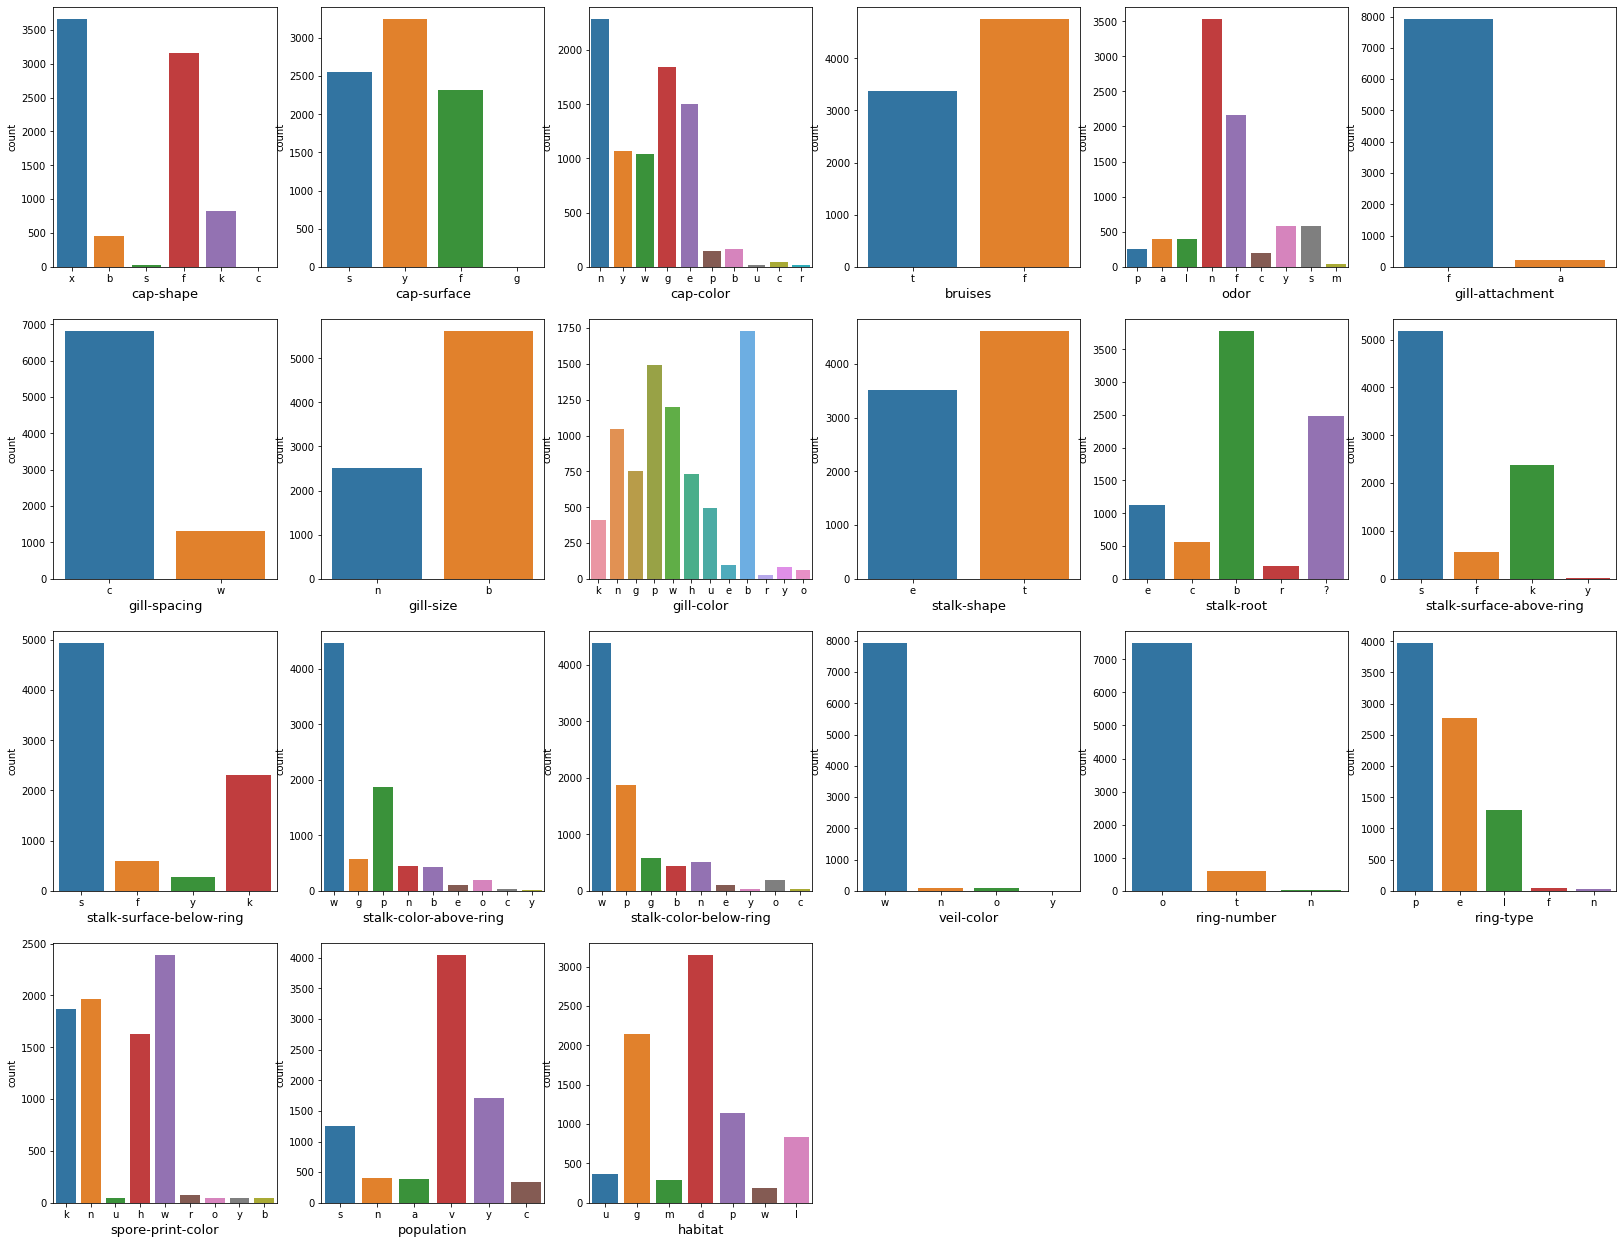

In [6]:
fig = plt.figure(figsize=(28,22))
i=1
for col in X.columns:
    ax = fig.add_subplot(4,6, i)
    b = sns.countplot(data = dataset, x = col)
    b.set_xlabel(col,fontsize=13)
    i+=1

Ara vull visualitzar quants verinosos i quants comestibles hi ha en cada un dels atributs de les variables.

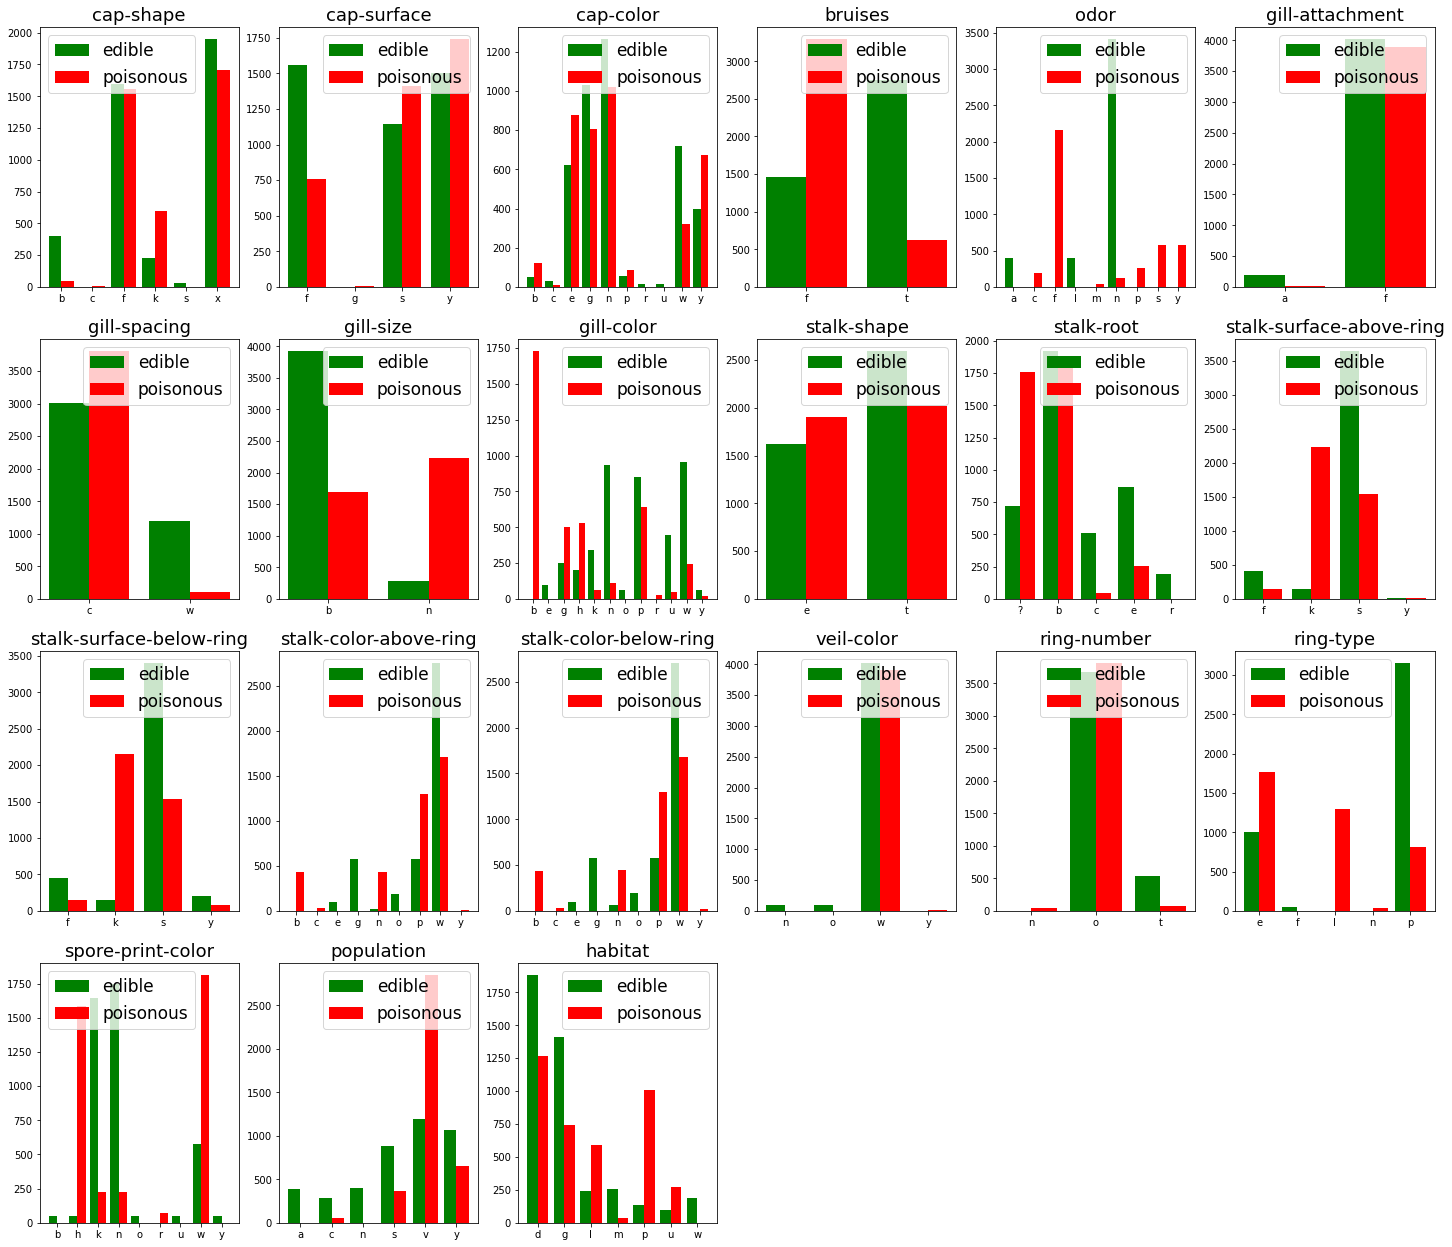

In [7]:
fig = plt.figure(figsize=(25,22))
a=1  
for c in X.columns:
    ax = fig.add_subplot(4,6, a)
    poisonous = [] 
    edibles = []    
    for i in np.unique(X[c]):
        size = len(dataset[dataset[c] == i].index)
        e = len(dataset[(dataset[c] == i) & (dataset['class'] == 'e')].index)
        edibles.append(e)
        poisonous.append(size-e)
    width = 0.40
    ind = np.arange(len(np.unique(X[c])))
    edible_bars = plt.bar(ind, edibles , width, color='green')
    poison_bars = plt.bar(ind+width, poisonous , width, color='red')
    
    ax.set_title(c,fontsize=18)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(np.unique(X[c]))
    ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=13)
    a+=1

Amb aquests plots ja es pot deduir quines variables seran més importants per la classificació.

Així, per exemple, l'olor sembla una variable força importatant.


## Convertir el dataset, de variables categoriques a dummies

Ara converteixo, totes les variables en dummies, no utilitzo el mínim nombre de dummies (que seria amb el drop_first activat) ja que penso que és més visual d'aquesta manera. Tot i que no aconsegueixi cap millora significativa.



In [8]:
X_dummy = pd.get_dummies(X,columns=X.columns) # drop_first=True)
X_dummy.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
print(X_dummy.shape)

(8124, 116)


Visualitzem el heatmap, tot i que al ser tan gran, costa més de interpretar-lo.

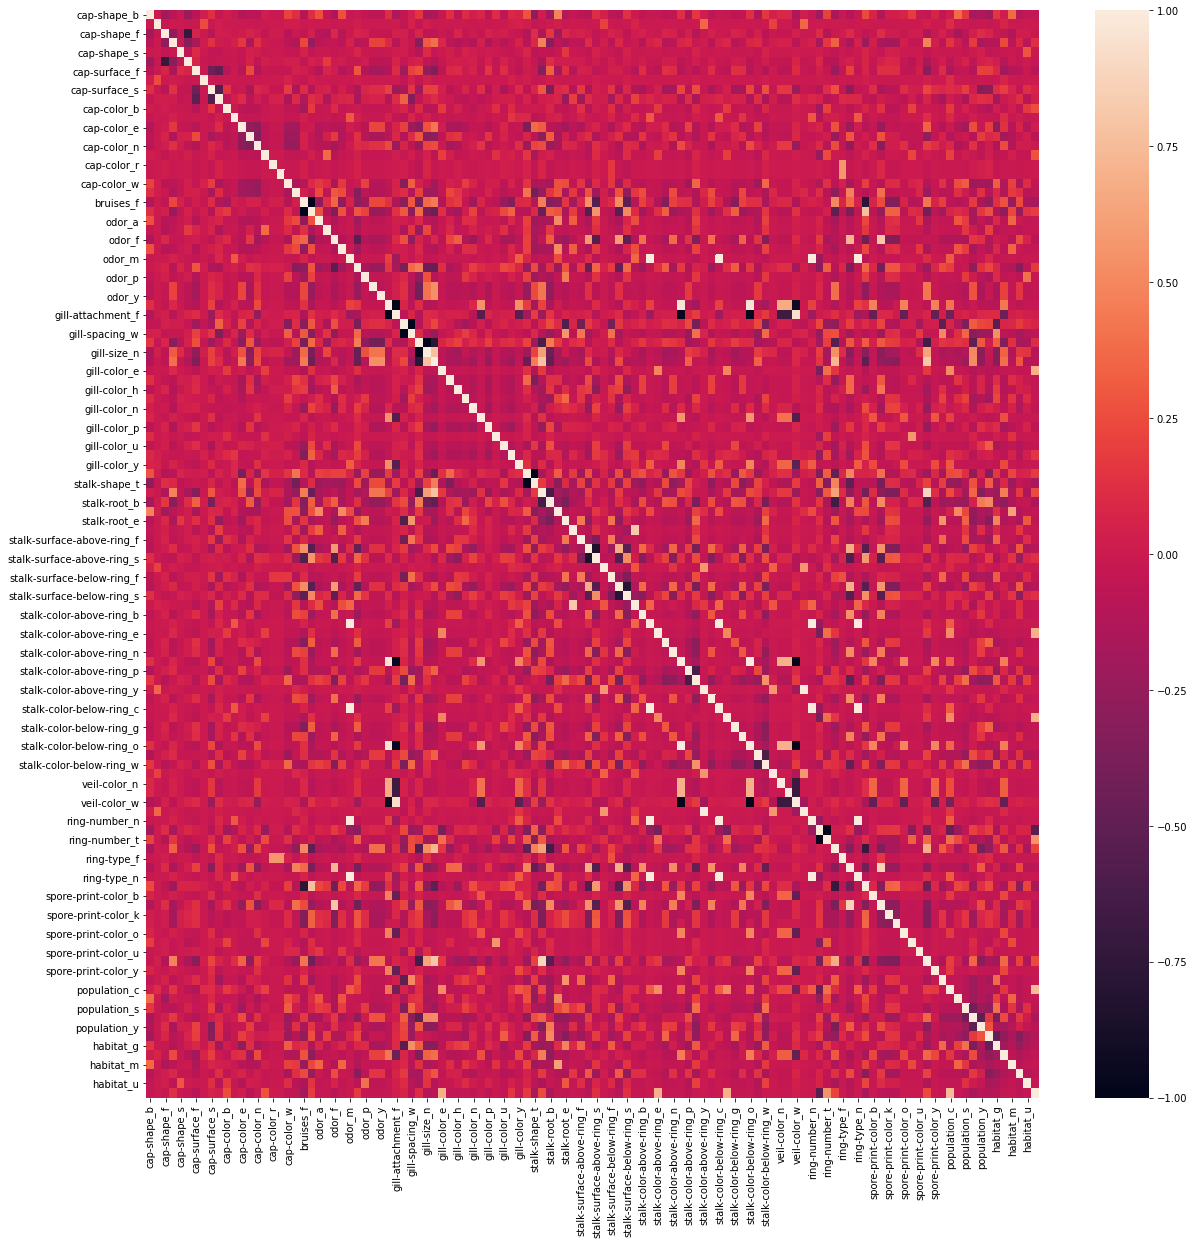

In [10]:
fig = plt.figure(figsize=(20,20))
c = X_dummy.corr()
sns.heatmap(c)

No vull tampoc extreure cap conclusió del heatmap però podria servir per entendre després millor els resultats.

També cal **normalitzar** el dataset, per facilitar l'aplicabilitat de certs models.

In [11]:
mm = make_pipeline(StandardScaler(), MinMaxScaler())

X_norm = mm.fit_transform(X_dummy)

Veiem si les diferents classes estan balancejades.

In [12]:
print(sum(y)/y.shape[0])

0.517971442639094


Un 48.2% del bolets del dataset són verinosos. No caldrà utilitzar cap estrategia per balancejar el dataset

**Funció per avaluar models** : Funció que calcula l'accuracy  o l'accuracy mitjana del model passat per argument. 

A més pot printar la matriu i el report.

In [13]:
def print_score(classifier,X_train,y_train,X_test,y_test,matriu=False,report=False, average = True):
    print('\n',type(classifier).__name__)
    if(average):
        res = cross_val_score(classifier, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}'.format(res.mean()))
    else:
        print('%-50s Accuracy Score: %.4f\n' % (classifier,accuracy_score(y_test,classifier.predict(X_test))))
    # print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    if(report): print('Classification Report:\n{}'.format(classification_report(y_test,classifier.predict(X_test))))
    if(matriu): print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# Classifier amb moltes variables.

Escullo  els següents 10 models, que he consideran que són els més bons per aquest dataset i una bona mostra representativa de tots els models que ens poden servir per fer classification. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
    MLPClassifier(solver='lbfgs') # adams va bé però és lentet
]


for classifier in models:  
    t = time.time()
    classifier.fit(X_train,y_train)
    print_score(classifier,X_train,y_train,X_test,y_test,matriu = False)
    print("temps = %3.4fs"%(time.time()-t))


 LogisticRegression
Average Accuracy:	0.9996
temps = 5.2941s

 SVC
Average Accuracy:	1.0000
temps = 4.8494s

 LinearSVC
Average Accuracy:	1.0000
temps = 0.4232s

 Perceptron
Average Accuracy:	1.0000
temps = 0.3539s

 SGDClassifier
Average Accuracy:	1.0000
temps = 0.2667s

 KNeighborsClassifier
Average Accuracy:	1.0000
temps = 1.2737s

 GaussianNB
Average Accuracy:	0.9541
temps = 0.2189s

 DecisionTreeClassifier
Average Accuracy:	0.9996
temps = 0.1346s

 RandomForestClassifier
Average Accuracy:	1.0000
temps = 0.5097s

 MLPClassifier
Average Accuracy:	1.0000
temps = 4.3150s


Veiem que els models considerats aconsegueixen accuracys perfectes. 

Per tant, el meu treball no està basat en aconseguir l'accuracy més alta, sinó mantenir-la molt alta agafant menys recursos i visualitzar diferents mètodes.

Ara visualitzem com va augmentant l'accuracy a mesura que augmentem el nombre d'atributs.

LogisticRegression             [0.88779 0.88779 0.88779 0.87883 0.92983 0.97591 0.97362 0.97362 0.97098 0.9745  0.9745 ]
SVC                            [0.88779 0.88779 0.88779 0.89377 0.92983 0.97591 0.97591 0.97696 0.99367 0.99912 0.99859]
LinearSVC                      [0.88779 0.88779 0.88779 0.87883 0.92983 0.95814 0.96025 0.97204 0.97098 0.96957 0.97098]
Perceptron                     [0.88779 0.88779 0.87232 0.88252 0.90644 0.91435 0.96606 0.93071 0.90591 0.94108 0.94865]
SGDClassifier                  [0.88779 0.88779 0.88779 0.88779 0.92754 0.97591 0.97591 0.97591 0.97872 0.97098 0.97907]
KNeighborsClassifier           [0.88779 0.77946 0.85702 0.8892  0.90345 0.97591 0.97591 0.96782 0.99367 0.99912 0.99912]
GaussianNB                     [0.88779 0.77946 0.85702 0.89377 0.92596 0.9198  0.92262 0.92262 0.92262 0.92156 0.92596]
DecisionTreeClassifier         [0.88779 0.88779 0.88779 0.89377 0.92983 0.97591 0.97591 0.97696 0.99455 1.      1.     ]
RandomForestClassifier         [

(0.825, 1.001)

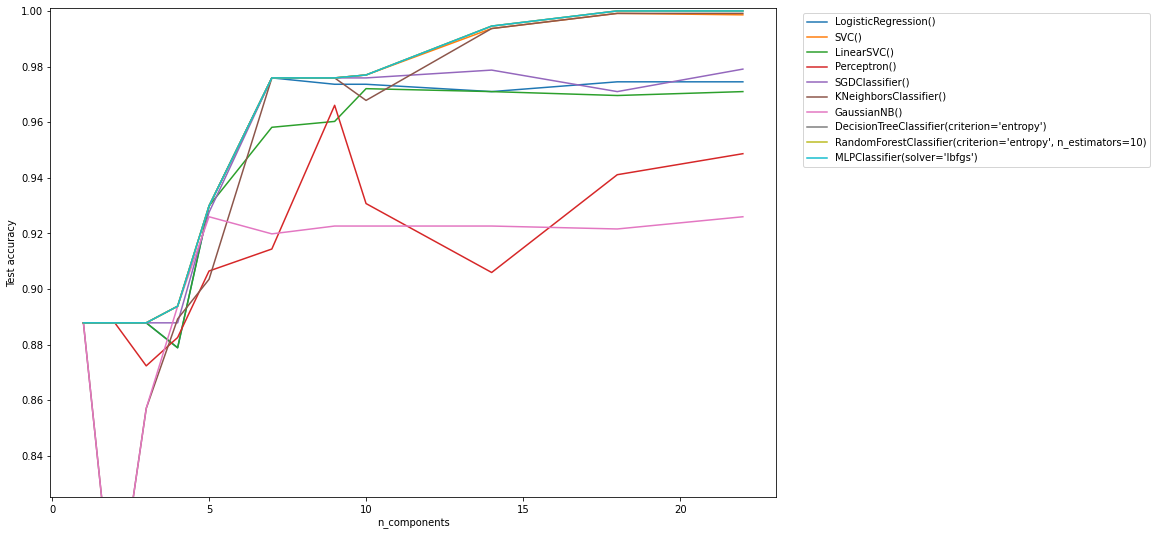

In [15]:
def k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final=0,step = 1,L = []):
    if(n_final):
        L = list(range(1,n_final+1,step))
    selector = [SelectKBest(score_func=chi2, k=i) for i in L]
    acc =[]
    for i in range(len(L)):
        X_train_r = selector[i].fit_transform(X_train,y_train)
        X_test_r = selector[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        res = cross_val_score(classifier, X_train_r, y_train, cv=2, n_jobs=-1, scoring='accuracy').mean()
        acc.append(res)
    plt.xlabel(L)
    plt.plot(L,acc,label = classifier)
    print(type(classifier).__name__.ljust(30, ' '),np.array(acc))

np.set_printoptions(precision=5, linewidth=np.inf)
plt.figure(figsize=(13,9))
for classifier in models:  
    L = list(range(1,5)) + list(range(5,10,2)) + list(range(10,23,4))
    k_features_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,L=L)
np.set_printoptions(precision=None, linewidth= None)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.ylim([0.825, 1.001])

Es pot veure com tenim un molt bon primer component, i que no tots els models tendeixen ràpidament a l'accuracy perfecte.

Els 5 models que destaquen per sobre la resta ja que tendeixen a l'accuracy perfecte són els següents:

    - SVC(kernel='rbf'),
    - KNeighborsClassifier(n_neighbors = 5),
    - DecisionTreeClassifier(criterion='entropy'),
    - RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
    - MLPClassifier(solver='lbfgs') # adams va bé però és lentet

Veiem que per aquests models augmenta l'accuracy de manera força constant i a les 14 iteracions, supera el 99% d'accuracy i abans de les 20, a nivell de accuracy, serà un model tan bo com si estiguéssim treballant amb tota la base de dades.

Primer de tot , vull visualitzar els resultats amb el millor atribut.

In [34]:
BK1 = SelectKBest(score_func=chi2,k=1)
BK1.fit(X_train,y_train)
s = BK1.get_support()

# Com és un sol atribut , amb un sol model en tenim prou.
LR = LogisticRegression()
LR.fit(X_train[:,s],y_train)
print_score(LR,X_train[:,s],y_train,X_test[:,s],y_test,matriu = True)


 LogisticRegression
Average Accuracy:	0.8878
Confusion Matrix:
[[1122   33]
 [ 249 1034]]



Em sembla molt interessant que un sol atribut pugui predir tan bé si els bolets son verinosos o no, així que vull detectar de quina variable es tracta.

cap-shape_s
[[4.81957]]


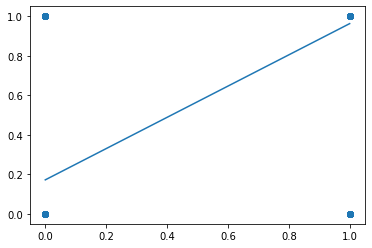

In [35]:
index = np.where(s)[0]
print(X_dummy.columns[index][0])

y_values = LR.predict_proba(X_test[:,index])[:,1] 
plt.plot(X_test[:,index], y_values)
plt.scatter(X_test[:,index], y_test)
print(LR.coef_)

odor_n correspon als bolets que no fan olor. Per tant, els bolets que no fan olor són molt més propensos a ser comestibles.

Ara , ja per curiositat, vull veure quins són els següents atributs que classifiquen millor per si sols. Penso que tot i computacionalment no ser molt interessant, a la pràctica podria ser rellevant ja que la gent busca un sol indicador per veure si són perillosos o no. 

Així que ara probem un model amb totes les variables per separat i a veure quin va millor.

In [18]:
LR = LogisticRegression()

D = {}
for i in range(X_train.shape[1]):
    LR.fit(X_train[:,i].reshape(-1, 1),y_train)
    D[X_dummy.columns[i]] = [accuracy_score(y_test,LR.predict(X_test[:,i].reshape(-1, 1))) , sum((LR.predict(X_test[:,i].reshape(-1, 1))!=y_test)[~y_test])/X_train.shape[0] ,int(np.sign(LR.coef_))]

print("Nom \t\t\t\t Accuracy\tFalsos Comestibles \tSigne de la correlació\n","-"*90)
_= [print("%-32s %.5f\t%.5f\t\t\t %d"%(i,j[0],j[1],j[2])) for i,j in dict(sorted(D.items(), key=lambda item: item[1][0],reverse=True)).items() if j[0]>0.75]

Nom 				 Accuracy	Falsos Comestibles 	Signe de la correlació
 ------------------------------------------------------------------------------------------
odor_n                           0.88433	0.00580			 1
odor_f                           0.79409	0.08829			 -1
stalk-surface-above-ring_k       0.77523	0.08969			 -1
ring-type_p                      0.76907	0.04344			 1
gill-size_b                      0.76169	0.08758			 1
gill-size_n                      0.76169	0.08758			 -1
stalk-surface-below-ring_k       0.76169	0.09497			 -1


Aquí podem veure que odor_n , no és només el millor atribut en solitari, sinó que a més, és el que dona menys falsos comestibles, que és el que sembla que més interessaria .

Un genial únic atribut !

Aquí veiem els resultats utilitzant **6 atributs**

In [19]:
m = SelectKBest(score_func=chi2,k=6)
m.fit(X_train,y_train)
s = m.get_support()
for classifier in models:  
    classifier.fit(X_train[:,s],y_train)
    print_score(classifier,X_train[:,s],y_train,X_test[:,s],y_test,matriu = False)


 LogisticRegression
Average Accuracy:	0.9759

 SVC
Average Accuracy:	0.9759

 LinearSVC
Average Accuracy:	0.9740

 Perceptron
Average Accuracy:	0.9604

 SGDClassifier
Average Accuracy:	0.9759

 KNeighborsClassifier
Average Accuracy:	0.9759

 GaussianNB
Average Accuracy:	0.9260

 DecisionTreeClassifier
Average Accuracy:	0.9759

 RandomForestClassifier
Average Accuracy:	0.9759

 MLPClassifier
Average Accuracy:	0.9759


# PCA
Anteriorment , he pogut veure que agafant 6 atributs puc aconseguir un bon model, i agafant-ne menys de 20 un excel·lent model.

Però ara vull veure si utilitzant un PCA agafant només 2 o 3 atributs es pot aconseguir un model tan bo com els anteriors.

L'objectiu és saber a quin nombre de components he de reduir l'espai, per aconseguir una bona accuracy, si amb 2 o 3 són suficients, es podrà fer un plot per visualitzar-ho.

Per això creare diferents subsets. Les variables que trio per a cada un són aconseguides a partir d'un PCA per a cada nombre de variables.

In [20]:
def pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final,print_all=True,cv = 2):
    pca = [0,0]+[PCA(n_components=i) for i in range(2,n_final+1)]
    acc =[]
    for i in range(2,n_final+1):
        X_train_r = pca[i].fit_transform(X_train)
        X_test_r = pca[i].transform(X_test)
        classifier.fit(X_train_r,y_train)
        res = cross_val_score(classifier, X_train_r, y_train, n_jobs=-1, scoring='accuracy',cv = cv).mean()
        acc.append(res)
    if(print_all):
        print(type(classifier).__name__.ljust(30, ' '),np.array(acc))
    plt.plot(range(2,n_final+1),acc,label = classifier)
    

LogisticRegression             [0.87337 0.87443 0.85016 0.94601 0.95427 0.96043]
SVC                            [0.91048 0.93475 0.97555 0.98452 0.98628 0.99033]
LinearSVC                      [0.87742 0.88393 0.86862 0.94513 0.95216 0.95656]
Perceptron                     [0.85561 0.84435 0.78016 0.92332 0.91066 0.92877]
SGDClassifier                  [0.88094 0.89008 0.8936  0.94812 0.94988 0.9548 ]
KNeighborsClassifier           [0.95515 0.98558 0.99261 0.99842 0.9993  0.99701]
GaussianNB                     [0.88129 0.88674 0.88674 0.89219 0.8936  0.89747]
DecisionTreeClassifier         [0.95269 0.98224 0.98892 0.99437 0.99455 0.99367]
RandomForestClassifier         [0.9555  0.98276 0.98998 0.99683 0.99613 0.9993 ]
MLPClassifier                  [0.95498 0.98435 0.98927 0.99648 0.99859 0.99877]


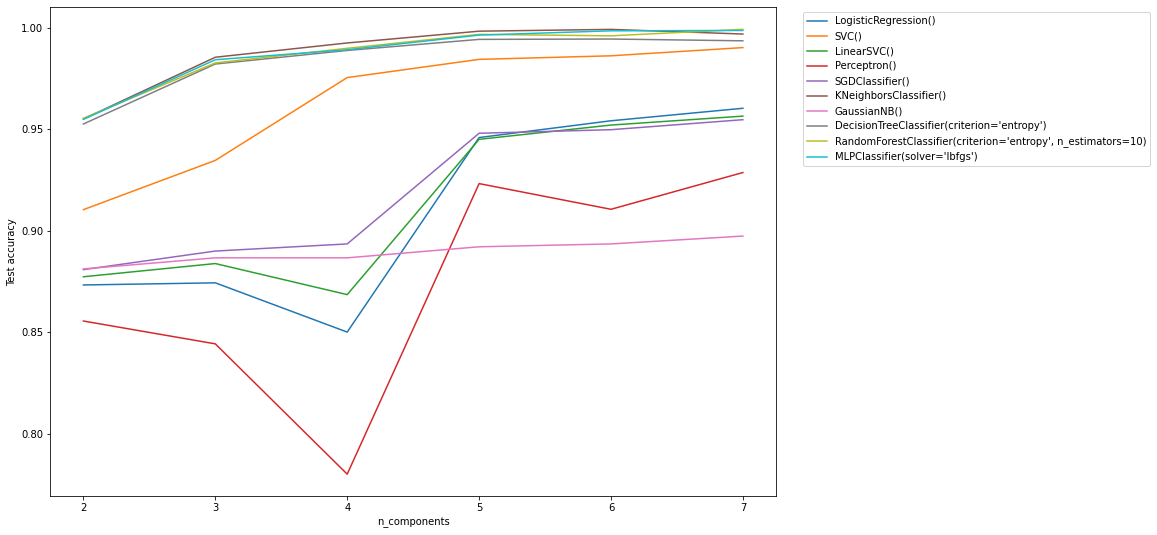

In [21]:
plt.figure(figsize=(13,9))

for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 7)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))


Tant aquí com en el best_k_features, veiem els mateixos 5 models que destaquen sobre la resta.

Bé, el SVC està una mica al mig, però l'agafo també. 


In [22]:
models = [
    SVC(kernel='rbf'),
    KNeighborsClassifier(n_neighbors = 5),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
    MLPClassifier(solver='lbfgs') # adams va bé però és lentet
]

all_models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    LinearSVC(), 
    Perceptron(), 
    SGDClassifier(),
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy'),
    MLPClassifier(solver='lbfgs') # adams va bé però és lentet
]


A més , tenim molts atributs i crec que es podria reduir molt la dimensió del dataset si abans hem vist que amb menys de 20 atributs ja aconseguim molt bones accuracys.

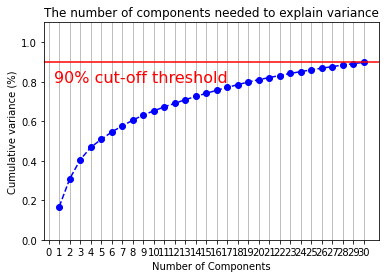

31


In [23]:
pca = PCA(n_components = 0.9).fit(X_train)
pc = pca.transform(X_train)
nc = int(pca.n_components_)

fig, ax = plt.subplots()
xx = np.arange(1, nc, step=1)
yy = np.cumsum(pca.explained_variance_ratio_[:(nc-1)])

plt.ylim(0.0,1.1)
plt.plot(xx, yy, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, nc, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.8, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()
print(nc)

Com hem vist anteriorment, amb molt pocs atributs ja aconsegueixo una molt bona accuracy, tot i així he volgut mantenir un 90% de variança i per tant n'he mantingut 31 , que ja és una reducció significativa del dataset tenint en compte que n'hi havia més de 100.

In [40]:
if (X_norm.shape[1]>50):
    m = SelectKBest(score_func=chi2,k=31)
    m.fit(X_train,y_train)
    s = m.get_support()

    X_norm = X_norm[:,s]
    X_train = X_train[:,s]
    X_test = X_test[:,s]

for classifier in models:  
    classifier.fit(X_train,y_train)
    t = time.time()
    print_score(classifier,X_train,y_train,X_test,y_test,matriu = False)
    print("temps = %3.4fs"%(time.time()-t))


 SVC
Average Accuracy:	0.9995
temps = 1.0436s

 KNeighborsClassifier
Average Accuracy:	0.9998
temps = 1.0591s

 DecisionTreeClassifier
Average Accuracy:	1.0000
temps = 0.2047s

 RandomForestClassifier
Average Accuracy:	1.0000
temps = 0.3100s

 MLPClassifier
Average Accuracy:	1.0000
temps = 2.4657s


SVC                            [0.93511 0.96025 0.95902]
KNeighborsClassifier           [1. 1. 1.]
DecisionTreeClassifier         [1. 1. 1.]
RandomForestClassifier         [1. 1. 1.]
MLPClassifier                  [0.98241 1.      1.     ]


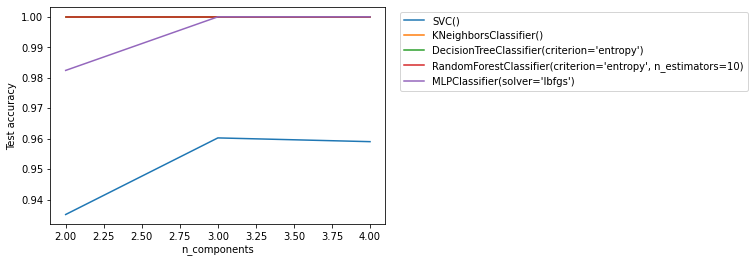

In [25]:
for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 4, cv = 5)
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))


Es pot veure com 4 dels 5 models tenen una accuracy molt alta amb un PCA de 2 atributs, i amb 3, l'acaben de perfeccionar.

Aquí es pot veure com el SVC es comença a distanciar.

## Visualització gràfica dels PCA de dimensió 2 i 3.

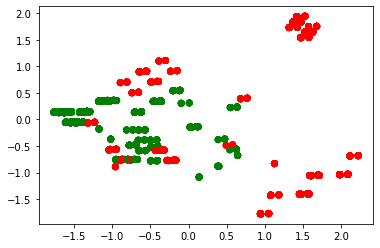

In [26]:
pca2 = PCA(2)
X_train_r = pca2.fit_transform(X_train)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], c=np.where(y_train == 0, 'r', 'g'))
plt.show()

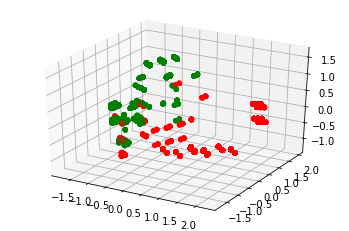

In [27]:
pca3 = PCA(3)
X_train_r = pca3.fit_transform(X_train)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_r[:, 0], X_train_r[:, 1], X_train_r[:, 2], c=np.where(y_train == 0, 'r', 'g'))
plt.show()


In [28]:
def plot_3d(elev, azim):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_train_r[:, 0], X_train_r[:, 1], X_train_r[:, 2], c=np.where(y_train == 0, 'r', 'g'))
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(0, 90), azim=(0, 360))

interactive(children=(IntSlider(value=45, description='elev', max=90), IntSlider(value=180, description='azim'…

<function __main__.plot_3d(elev, azim)>

Per al PCA de dimensio 2, he aprofundit més mostrant la separació que fa el model a l'espai de cerca.


In [29]:
def visualization_test(model,X, y, step = 0.025):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = step),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = step))
    
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    Labels = ['Poisonous','Edibles']
    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = 'rg'[i], label = Labels[i])
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

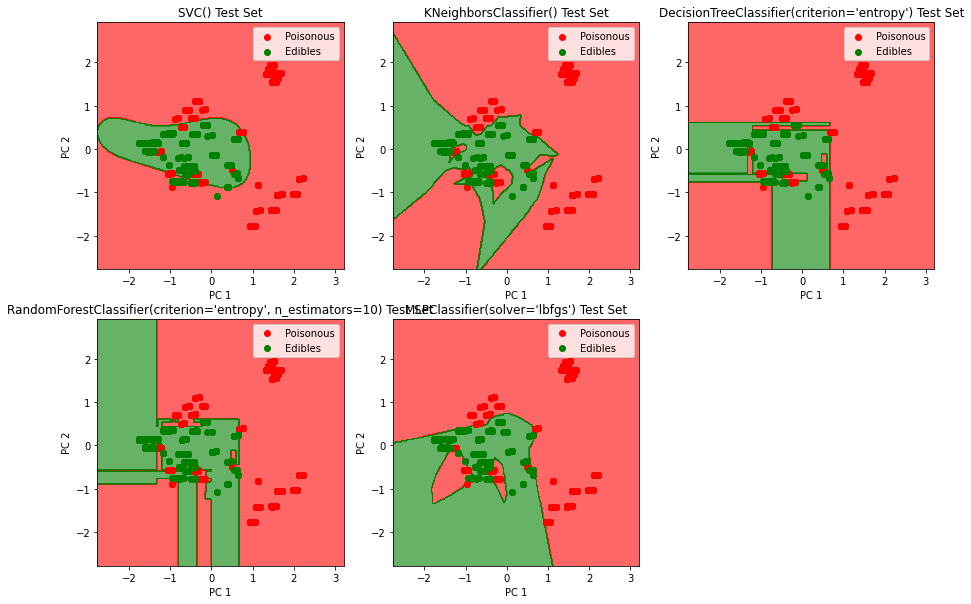

In [30]:
fig = plt.figure(figsize=(15,10))
i = 1
for classifier in models: 
    pca = PCA(2) 
    X_train_r = pca.fit_transform(X_train)
    X_test_r = pca.transform(X_test)
    classifier.fit(X_train_r,y_train)
    ax = fig.add_subplot(2,3, i)
    i+=1
    visualization_test(classifier,X_test_r,y_test)
plt.show()

## t-SNE

t-SNE és un algoritme no supervisat, per tant, no podem avaluar-lo, però si visualitzar-lo.

Doncs poso com a objectiu aconseguir una visualització 2d i 3d i comparar-les amb les visualitzacions del PCA.

Aquí ens trobem per primer cop amb una execució lenta, les següents cel·les poden trigar uns minuts en executar-se.

**t-SNE 2 dimensions** 

Tot i no ser d'aprenentatge supervisat, podem veure com funcionen els models en l'espai transformat. Separarem el nou espai entre entrenament i test i calcularem l'accuracy per a cada model .


Cal remarcar, que a diferència del PCA, la transformació de l'espai no és instantània. EL t-SNE segueix un algoritme més complicat i triga més en executar-se. 

He intentat però, que cap cel·la trigui més de dos minuts en executar-se.

temps en fer el T-SNE = 72.3300s



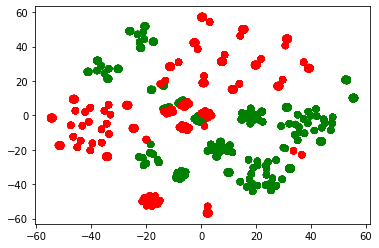


 SVC
Average Accuracy:	0.9546

 KNeighborsClassifier
Average Accuracy:	1.0000

 DecisionTreeClassifier
Average Accuracy:	1.0000

 RandomForestClassifier
Average Accuracy:	1.0000

 MLPClassifier
Average Accuracy:	0.9599


In [31]:
t=time.time()
tsne2 = TSNE(n_components=2, n_iter=750, perplexity = 100) 
X_tsne2 = tsne2.fit_transform(X_norm)
print("temps en fer el T-SNE = %3.4fs\n"%(time.time()-t))
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=np.where(y == 0, 'r', 'g'))
plt.show()

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tsne2, y, test_size=0.3)


acc = np.zeros((5,2))
i=0
for classifier in models:  
    # no mesuro temps ja que treballo sobre dimensió 2, i són massa petits com per tenir-los en compte
    classifier.fit(X_train_t,y_train_t)
    print_score(classifier,X_train_t,y_train_t,X_test_t,y_test_t)
    acc[i,0] = accuracy_score(y_test_t,classifier.predict(X_test_t))
    i+=1


També visualitzem com és la separació tal i com hem vist al PCA 2d.


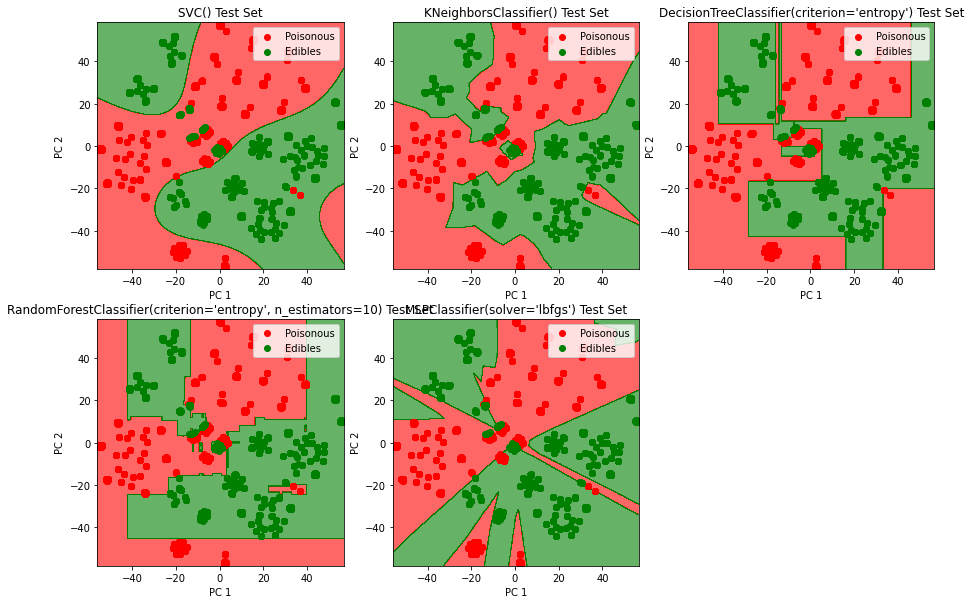

In [32]:
fig = plt.figure(figsize=(15,10))
i = 1
for classifier in models:  
    classifier.fit(X_train_t, y_train_t)
    ax = fig.add_subplot(2,3, i)
    i+=1
    visualization_test(classifier,X_test_t,y_test_t,step = 0.2) # augmentar l'step si es vol més ràpid, disminuir si es vol més precís.
plt.show()

**TSNE 3 dimensions**

He redüit una mica les iteracions ja que aquest triga encara més.

temps en fer el T-SNE = 156.6126s



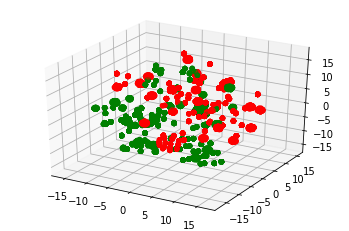


 SVC
Average Accuracy:	0.9562

 KNeighborsClassifier
Average Accuracy:	1.0000

 DecisionTreeClassifier
Average Accuracy:	0.9998

 RandomForestClassifier
Average Accuracy:	0.9998

 MLPClassifier
Average Accuracy:	1.0000


In [36]:
t = time.time()
tsne3 = TSNE(n_components=3, n_iter=425, perplexity = 75)
X_tsne3 = tsne3.fit_transform(X_norm)
print("temps en fer el T-SNE = %3.4fs\n"%(time.time()-t))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=np.where(y == 0, 'r', 'g'))
end = time.time()
plt.ion()
plt.show()

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tsne3, y, test_size=0.3)

i=0
for classifier in models: 
    # no mesuro temps ja que treballo sobre dimensió 3, i són massa petits com per tenir-los en compte
    classifier.fit(X_train_t,y_train_t)
    print_score(classifier,X_train_t,y_train_t,X_test_t,y_test_t)
    acc[i,1] = accuracy_score(y_test_t,classifier.predict(X_test_t))
    i+=1



In [ ]:
def plot_3d(elev, azim):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=np.where(y == 0, 'r', 'g'))
    ax.view_init(elev=elev, azim=azim)
    plt.show()

interact(plot_3d, elev=(0, 90), azim=(0, 360))

In [ ]:
print(acc)

In [ ]:
for i in range(4):
    plt.plot(range(2,4),acc[i,:],label = models[i])

plt.title("t-sne")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

for classifier in models:  
    pca_accuracy_evolution(classifier,X_train,y_train,X_test,y_test,n_final = 3,print_all=False)

plt.title("PCA")
plt.xlabel("n_components")
plt.ylabel("Test accuracy")
plt.legend(bbox_to_anchor=(1.03, 1))

Ja podem veure que el SVC està molt per sota dels altres 3. Tot i que sempre es manté al voltant del 95% d'accuracy.

**Però alerta !**

El PCA ens serveix per fer aprenentatge supervisat, com es tracta d'una transformació lineal en l'espai només cal que les dades a validar siguin també transformades.


En canvi el t-SNE no funciona de la mateixa manera, transforma totes les dades de manera no lineal i no podem afegir nova informació fàcilment. Per tant, si no disposessim de les dades a validar inicialment, no podríem provar els models. Hauríem, un cop rebudes les dades, de tornar a repetir el t-SNE de nou amb totes les dades.



## Comparació de resultats

Aquest dataset, és un dataset que permet aconseguir una accuracy perfecte fàcilment, així que el propòsit ha estat més centrat en poder aconseguir bons resultats amb 2 i 3 atributs utilitzant estratègies que modifiquin l'espai de cerca com el t-SNE o el PCA. D'aquesta manera també es pot visualitzar bé.

Com sempre són accuracys molt altes, he prioritzat només dos components a tenir en compte: L'accuracy i el temps d'execució

------------ Taules -------------

<style>
body {
  font-size: 50px;
}
</style>
<body>

| a | b | c |
|---|---|---|
|c|c|c|

</body>

\begin{tabular}{cc}
    Accuracy & Time \\
    0.98 & 0.12 \\
    0.92 & 0.34 \\
    0.75 & 0.65 \\
\end{tabular}


\

In [41]:
resultats = {
    'Dataset complert': [0.9, 0.8, 0.7],
    'model2': [0.8, 0.7, 0.6],
    'model3': [0.7, 0.6, 0.5]
}

r = pd.DataFrame(results)
r.head()

,Dataset complert,model2,model3
0,0.9,0.8,0.7
1,0.8,0.7,0.6
2,0.7,0.6,0.5
